# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
#importing_Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report


In [2]:
#importing_data
df = pd.read_csv(r"C:\Users\HARRY\Downloads\Company_Data (3).csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
#Data_Cleaning

In [7]:
df["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [8]:
# Dealing with Categorical Columns for independent variables
df=pd.get_dummies(df,columns=["Urban","US"],drop_first=True)

In [9]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


# Train Test Split

In [11]:
x=df.drop(columns=["Sales"])
y=df["Sales"]

In [12]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [13]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=42)

In [15]:
y_train.unique()

array([ 7.4 , 13.91,  4.1 ,  9.16,  7.22,  8.47,  5.36,  7.41,  3.47,
        5.33,  8.65,  6.18,  7.57, 10.59,  4.94,  7.72,  5.58,  9.64,
        3.89,  8.55,  5.04,  9.  ,  7.58,  8.85,  5.93, 11.85,  8.73,
        6.52,  7.02,  9.32,  6.5 ,  8.67, 11.82,  5.32,  3.07,  8.32,
        9.14,  7.6 ,  8.03, 11.19, 10.21,  8.98, 12.29,  6.88, 10.14,
        7.54, 10.44,  5.74,  6.71, 10.  ,  6.15,  8.77, 10.48,  7.37,
        7.23,  5.31,  9.7 ,  5.9 ,  8.89, 12.3 ,  6.64,  7.71,  6.97,
        5.21,  6.62,  0.37, 10.26,  6.63,  5.87,  6.67, 10.49,  9.01,
        7.56,  5.07,  7.52, 15.63,  5.94,  7.9 ,  7.78,  7.53,  7.3 ,
        9.45,  7.95,  6.81,  5.68, 10.51,  5.4 ,  4.53,  7.99,  8.19,
        9.48,  0.53,  4.69,  7.45,  7.36, 13.39,  4.95,  9.09,  4.74,
        3.62,  2.66, 10.62,  6.41,  4.19,  9.34,  3.9 ,  9.08,  8.7 ,
        5.17,  7.5 ,  8.61,  5.3 ,  7.63,  5.28,  2.05,  9.39,  7.74,
        4.47,  6.59, 11.96, 11.7 , 10.07,  7.49,  6.23,  9.4 ,  8.8 ,
       10.71,  7.8 ,

# Model Building

In [16]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [17]:
cv=KFold(n_splits=10)
modelll=RandomForestRegressor(n_estimators=100,random_state=42)
scores=cross_val_score(model,x_train,y_train,cv=cv)

In [18]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [19]:
scores

array([0.71784208, 0.50867201, 0.67678416, 0.72654158, 0.50640536,
       0.69038043, 0.59594942, 0.64494382, 0.67307995, 0.75741571])

In [20]:
scores.mean()

0.6498014506597646

# Hyperparameter tuning

In [21]:
n_estimators = list(range(1,200))
criterion=["squared_error", "absolute_error", "poisson"]
parameters = {"criterion" : criterion, "n_estimators" : n_estimators}

model = RandomForestRegressor()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [22]:
print(grid.best_score_)
print(grid.best_params_)

0.6243373010604696
{'criterion': 'squared_error', 'n_estimators': 148}


In [24]:
model = RandomForestRegressor(criterion= 'squared_error', n_estimators=148, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=148, random_state=0)

In [25]:
feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

Price          0.316840
ShelveLoc      0.261749
Age            0.112610
CompPrice      0.092787
Advertising    0.081351
Income         0.052179
Population     0.036792
Education      0.032357
US_Yes         0.006991
Urban_Yes      0.006344
dtype: float64

# Visualize feature scores of the features

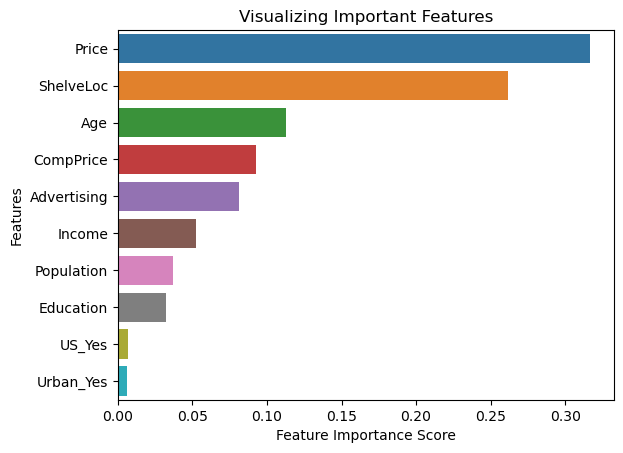

In [26]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error
y_pred=model.predict(x_test)
mean_absolute_error(y_test,y_pred)

1.402242398648648